Here are the steps we'll follow:

1. Data Loading: Download and load the dataset from the provided link.
2. Data Exploration and Preprocessing: Explore the dataset to understand its structure, missing values, and data types. Perform any necessary preprocessing steps.
3. Feature Selection: Select relevant features that could influence the purchasing decision.
4. Data Splitting: Split the dataset into training and testing subsets.
5. Model Building: Build a decision tree classifier using libraries like scikit-learn.
6. Model Training: Train the decision tree classifier using the training data.
7. Model Evaluation: Evaluate the model's performance using metrics like accuracy, precision, recall, and F1-score on the testing data.
8.  Visualizing the Decision Tree: Visualize the decision tree to understand its decision-making process.
9. Interpretation: Interpret the results and insights gained from the decision tree.

# DATA UNDERSTANDING

# Summary of Columns in "bank-full.csv" Dataset

1. **age**: Age of the bank client (numeric)
2. **job**: Type of job (categorical)
3. **marital**: Marital status (categorical)
4. **education**: Education level (categorical)
5. **default**: Has credit in default? (categorical)
6. **balance**: Average yearly balance, in euros (numeric)
7. **housing**: Has housing loan? (categorical)
8. **loan**: Has personal loan? (categorical)
9. **contact**: Contact communication type (categorical)
10. **day**: Last contact day of the month (numeric)
11. **month**: Last contact month of the year (categorical)
12. **duration**: Last contact duration, in seconds (numeric)
13. **campaign**: Number of contacts performed during this campaign (numeric)
14. **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric)
15. **previous**: Number of contacts performed before this campaign (numeric)
16. **poutcome**: Outcome of the previous marketing campaign (categorical)
17. **y**: Has the client subscribed a term deposit? (binary)


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

class BankDatasetAnalyzer:
    def __init__(self, dataset_path):
        # Initialize the BankDatasetAnalyzer with the dataset path
        self.dataset_path = dataset_path
        self.dataset = pd.read_csv(dataset_path, delimiter=";")
        
    def preview_dataset(self, num_rows=5):
        # Display the first few and last few rows of the dataset
        print(f"Preview of the dataset (first {num_rows} rows):")
        print(self.dataset.head(num_rows))
        print(f"Preview of the dataset (last {num_rows} rows):")
        print(self.dataset.tail(num_rows))

    def check_columns_list(self):
        # Get the list of columns in the dataset
        return self.dataset.columns.tolist()

    def explore_column_value_counts(self):
        # Explore the value counts for each column
        column_value_counts = {}

        for column in self.dataset.columns:
            column_value_counts[column] = self.dataset[column].value_counts()

        for column, values in column_value_counts.items():
            print(f"Value Counts for Column '{column}':\n{values}\n")

    def get_dataset_shape(self):
        # Get the shape of the dataset
        return self.dataset.shape

    def get_dataset_info(self):
        # Get information about the dataset
        return self.dataset.info()

    def get_dataset_description(self):
        # Get a statistical description of the dataset
        return self.dataset.describe()

    def analyze_duplicated_rows(self):
        # Analyze duplicate rows
        duplicate_count = self.dataset.duplicated().sum()

        # Print duplicate rows count
        print("Duplicate Rows Count:", duplicate_count)

        # Calculate the percentage of duplicate rows
        duplicate_percentage = (duplicate_count / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of duplicate rows
        plt.figure(figsize=(6, 4))
        sns.barplot(x=["Duplicate Rows", "Non-Duplicate Rows"],
                    y=[duplicate_percentage, 100 - duplicate_percentage], color='skyblue', edgecolor='black')
        plt.ylabel("Percentage (%)")
        plt.title("Percentage of Duplicated Rows")
        plt.tight_layout()
        plt.show()
    
    def analyze_missing_values(self):
        # Analyze missing values
        missing_values_count = self.dataset.isnull().sum()

        # Print missing values counts
        print("Missing Values Counts:")
        print(missing_values_count)

         # Calculate the percentage of missing values for each column
        missing_percentage = (self.dataset.isnull().sum() / len(self.dataset)) * 100

        # Create a bar chart to visualize the percentage of missing values
        plt.figure(figsize=(10, 6))
        sns.barplot(x=missing_percentage.index, y=missing_percentage.values, color='skyblue', edgecolor='black')
        plt.xlabel('Columns')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Percentage of Missing Values in Each Column')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def count_data_types(self):
        # Count the data types in the dataset
        return self.dataset.dtypes.value_counts()

    def count_unique_values_by_dtype(self):
         # Group columns by data type
        data_types = self.dataset.dtypes

        # Separate columns by data type
        int_columns = data_types[data_types == 'int64'].index
        float_columns = data_types[data_types == 'float64'].index
        object_columns = data_types[data_types == 'object'].index
        
        print("Unique Values Counts by Data Type:")

        # Print columns and their counts for each data type
        print("Integer Columns:")
        print(self.dataset[int_columns].nunique())

        print("\nFloat Columns:")
        print(self.dataset[float_columns].nunique())

        print("\nObject Columns:")
        print(self.dataset[object_columns].nunique())


Preview of the dataset (first 5 rows):
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Preview of the dataset (last 5 rows):
       age           job   marital

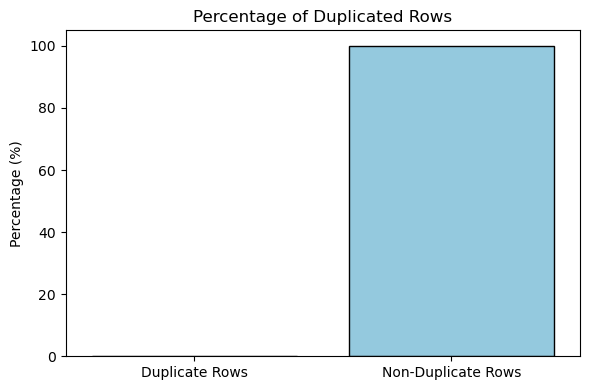

Missing Values Counts:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


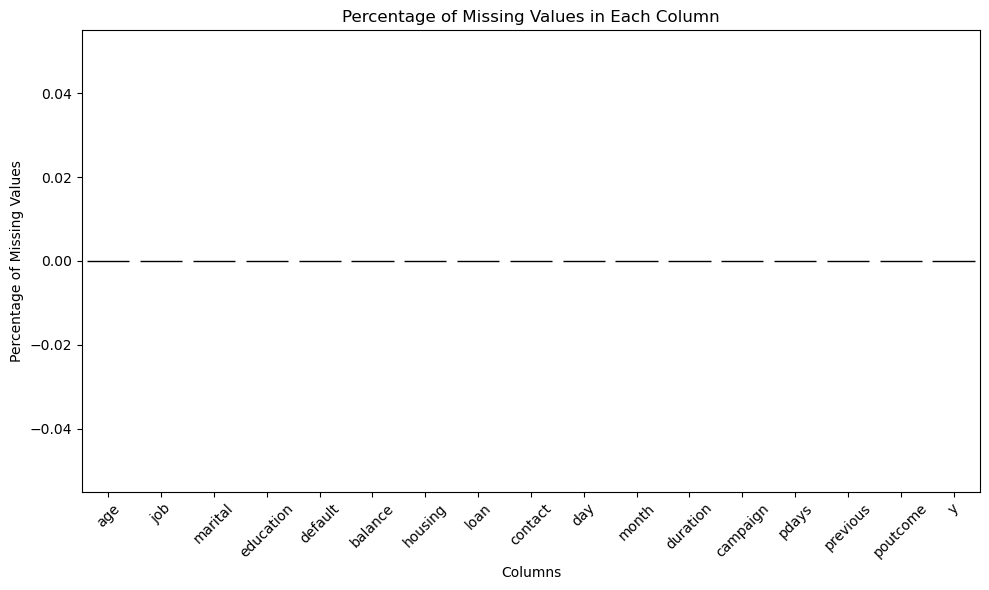

Data types counts:
object    10
int64      7
dtype: int64
Unique Values Counts by Data Type:
Integer Columns:
age           77
balance     7168
day           31
duration    1573
campaign      48
pdays        559
previous      41
dtype: int64

Float Columns:
Series([], dtype: float64)

Object Columns:
job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
y             2
dtype: int64


In [5]:
# Create an instance of BankDatasetAnalyzer
analyzer = BankDatasetAnalyzer("data/bank/bank-full.csv")

# Preview the dataset
analyzer.preview_dataset()

# Get the list of columns in the dataset
columns_list = analyzer.check_columns_list()
print("Columns in the dataset:", columns_list)

# Explore value counts for each column
analyzer.explore_column_value_counts()

# Get the shape of the dataset
dataset_shape = analyzer.get_dataset_shape()
print("Shape of the dataset:", dataset_shape)

# Get information about the dataset
dataset_info = analyzer.get_dataset_info()
print("Information about the dataset:")
print(dataset_info)

# Get a statistical description of the dataset
dataset_description = analyzer.get_dataset_description()
print("Statistical description of the dataset:")
print(dataset_description)

# Analyze duplicate rows and visualize the percentage
analyzer.analyze_duplicated_rows()

# Analyze missing values and visualize the percentage
analyzer.analyze_missing_values()

# Count data types in the dataset
data_type_counts = analyzer.count_data_types()
print("Data types counts:")
print(data_type_counts)

# Count unique values by data type
analyzer.count_unique_values_by_dtype()


# EXPLORATORY DATA ANALYSIS(EDA)

## UNIVARIATE ANALYSIS

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class UnivariateVisualizer:
    def __init__(self, data):
        self.data = data
        self.categorical_vars = self.data.select_dtypes(include=['object']).columns.tolist()
        self.continuous_vars = self.data.select_dtypes(include=['int64', 'float64']).columns.tolist()
        sns.set_palette("pastel")

    def plot_categorical_distribution(self):
        num_cat_vars = len(self.categorical_vars)
        num_rows = (num_cat_vars + 1) // 2  # Adjust number of rows
        num_cols = 2  # Fixed number of columns

        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
        for ax, cat_var in zip(axes.flatten(), self.categorical_vars):
            sns.countplot(data=self.data, x=cat_var, ax=ax)
            ax.set_title(f'Distribution of {cat_var}\n')
            ax.set_ylabel('Count')
            ax.set_xlabel(cat_var)
            ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_continuous_distribution(self):
        num_cont_vars = len(self.continuous_vars)
        num_rows = (num_cont_vars + 2) // 3  # Adjust number of rows
        num_cols = 3  # Fixed number of columns

        fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 6 * num_rows))
        for ax, cont_var in zip(axes.flatten(), self.continuous_vars):
            sns.histplot(data=self.data, x=cont_var, bins=20, kde=True, ax=ax)
            ax.set_title(f'Distribution of {cont_var}\n')
            ax.set_ylabel('Count')
            ax.set_xlabel(cont_var)
            ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()
        plt.show()



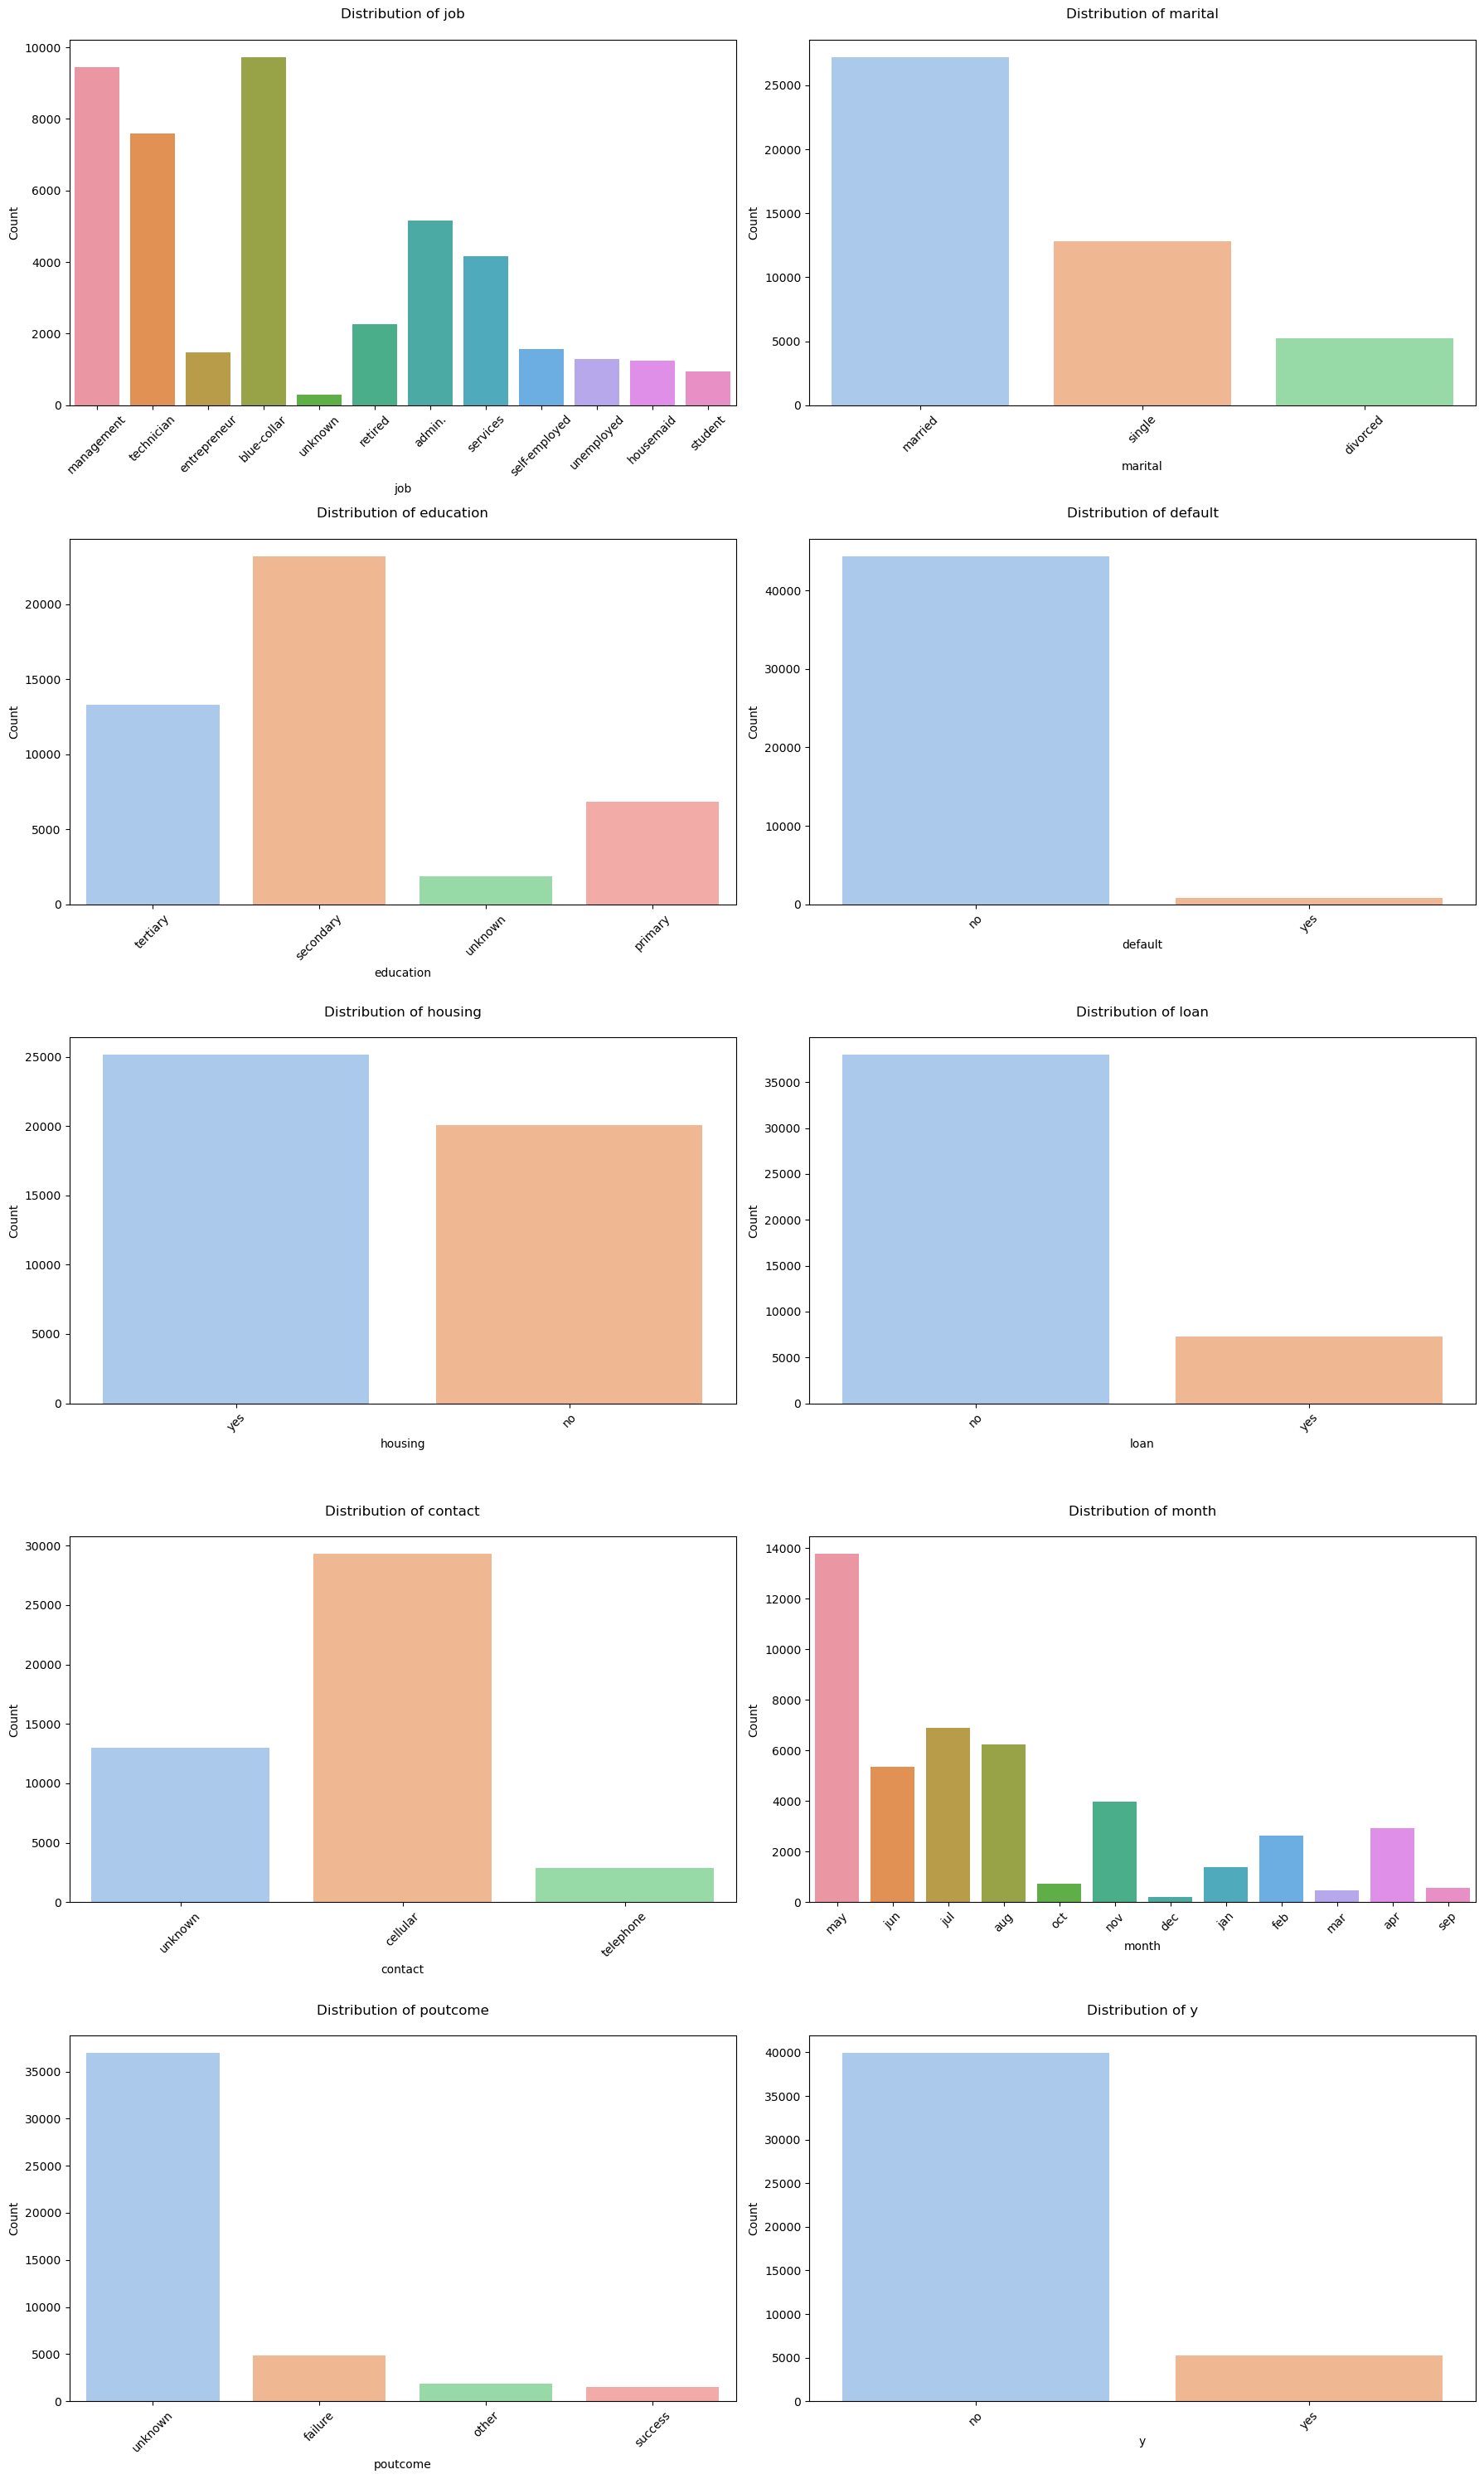

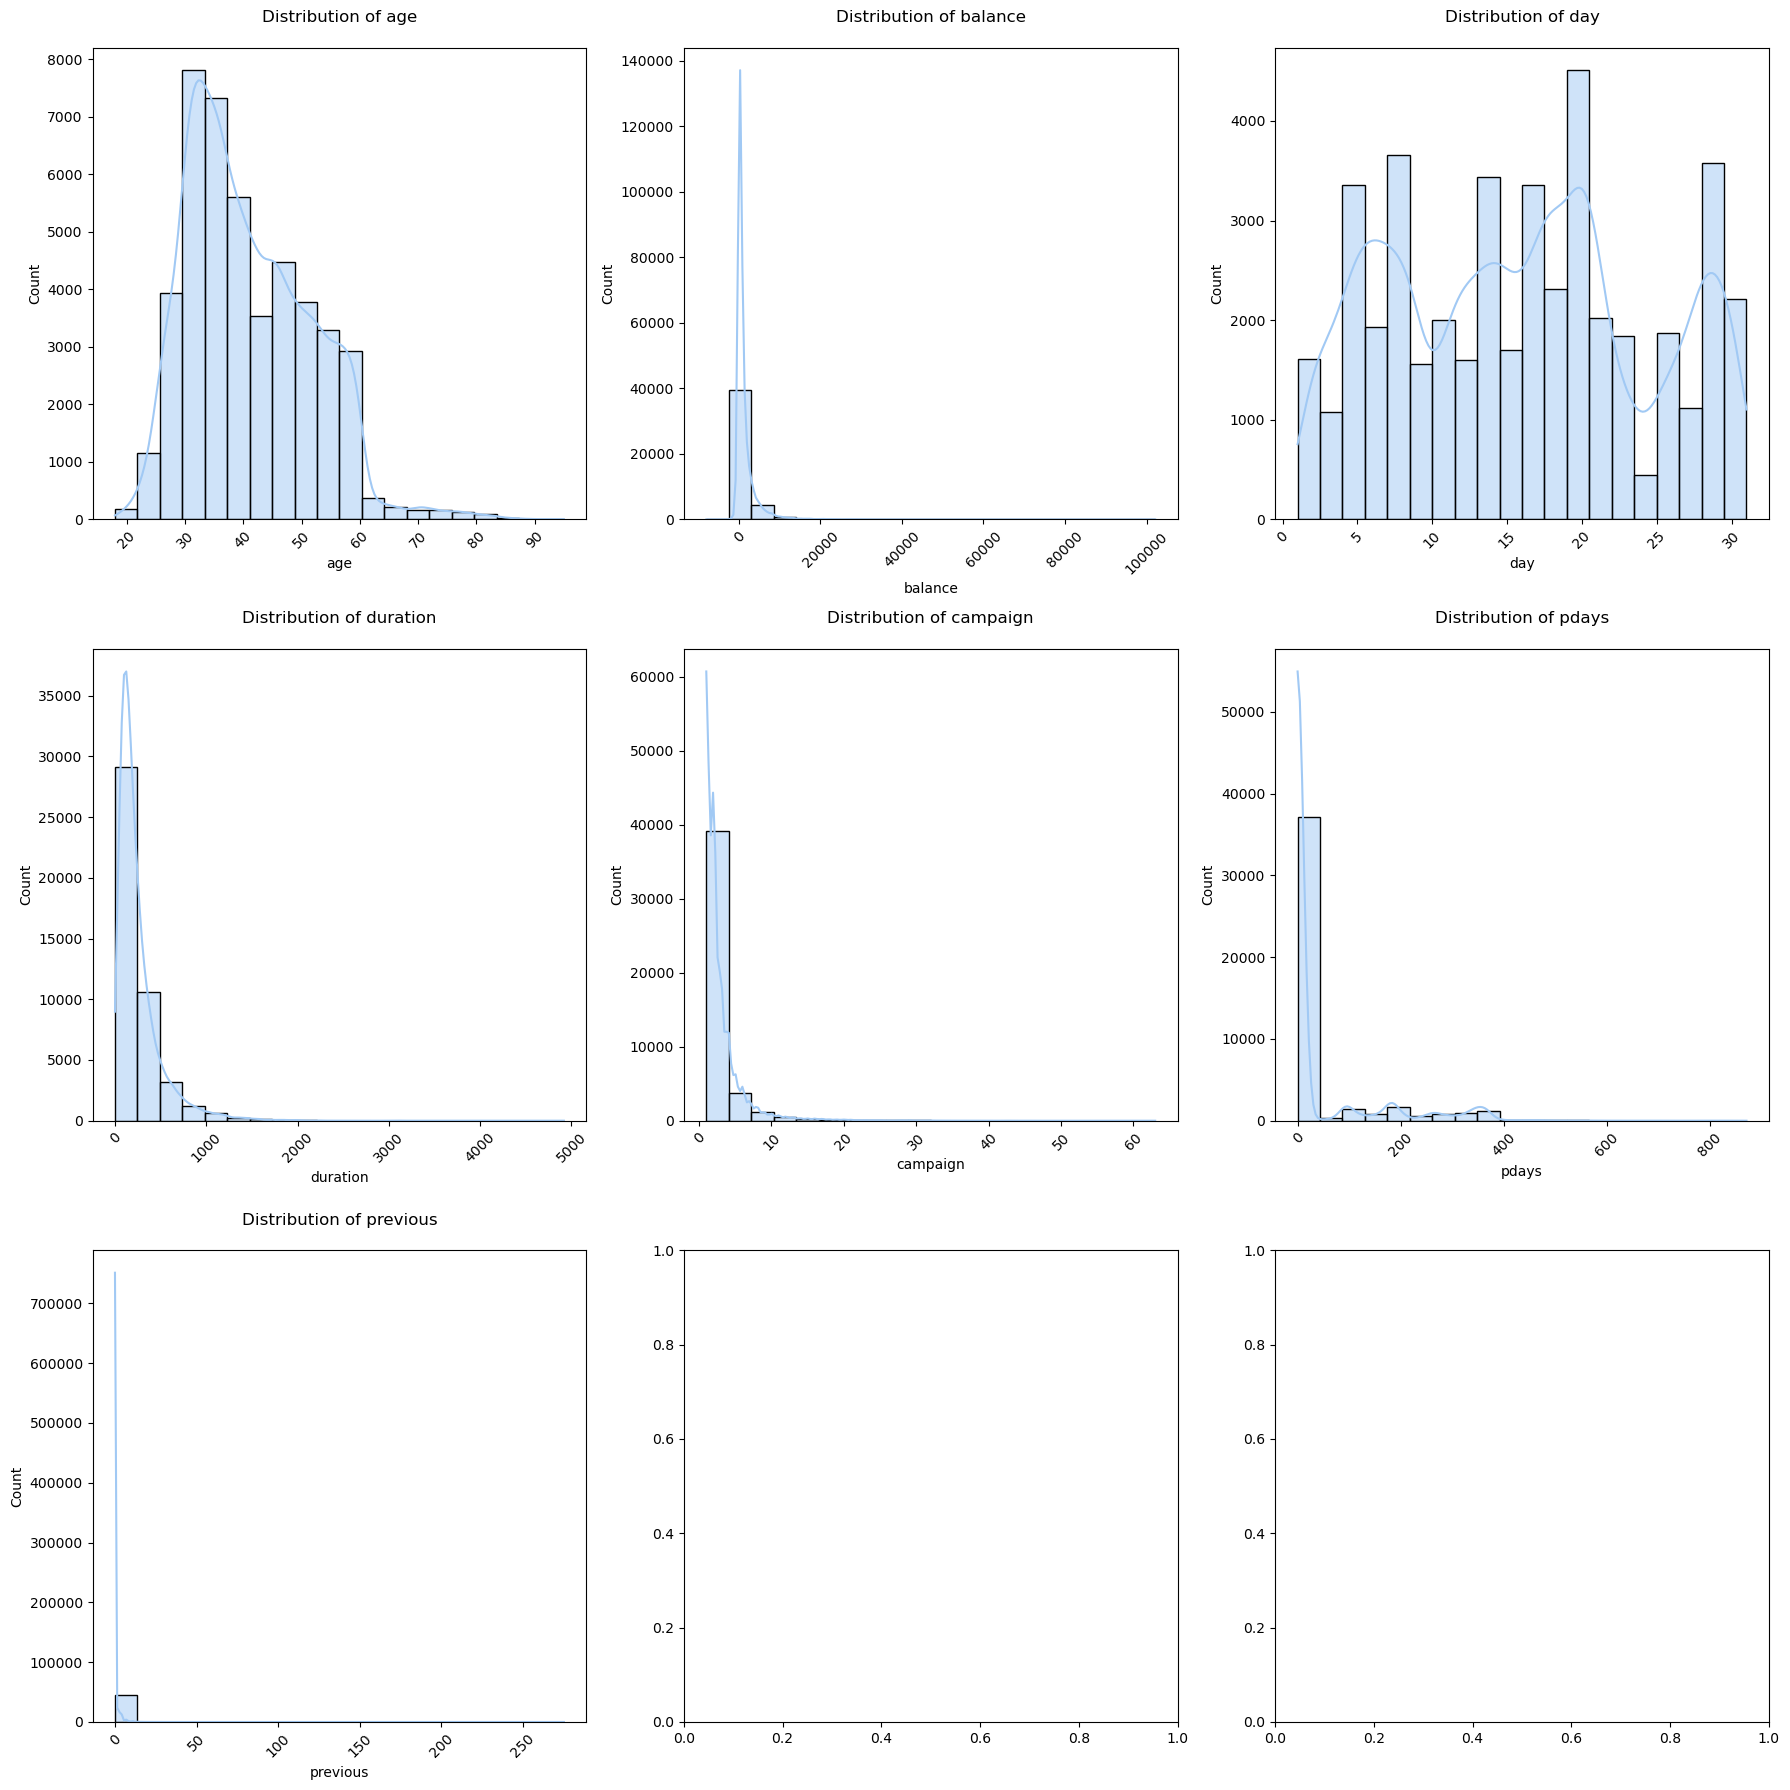

In [7]:
# Create an instance of the UnivariateVisualizer class
visualizer = UnivariateVisualizer(analyzer.dataset)

# Plot categorical distribution
visualizer.plot_categorical_distribution()

# Plot continuous distribution
visualizer.plot_continuous_distribution()

# BIVARIATE ANALYSIS

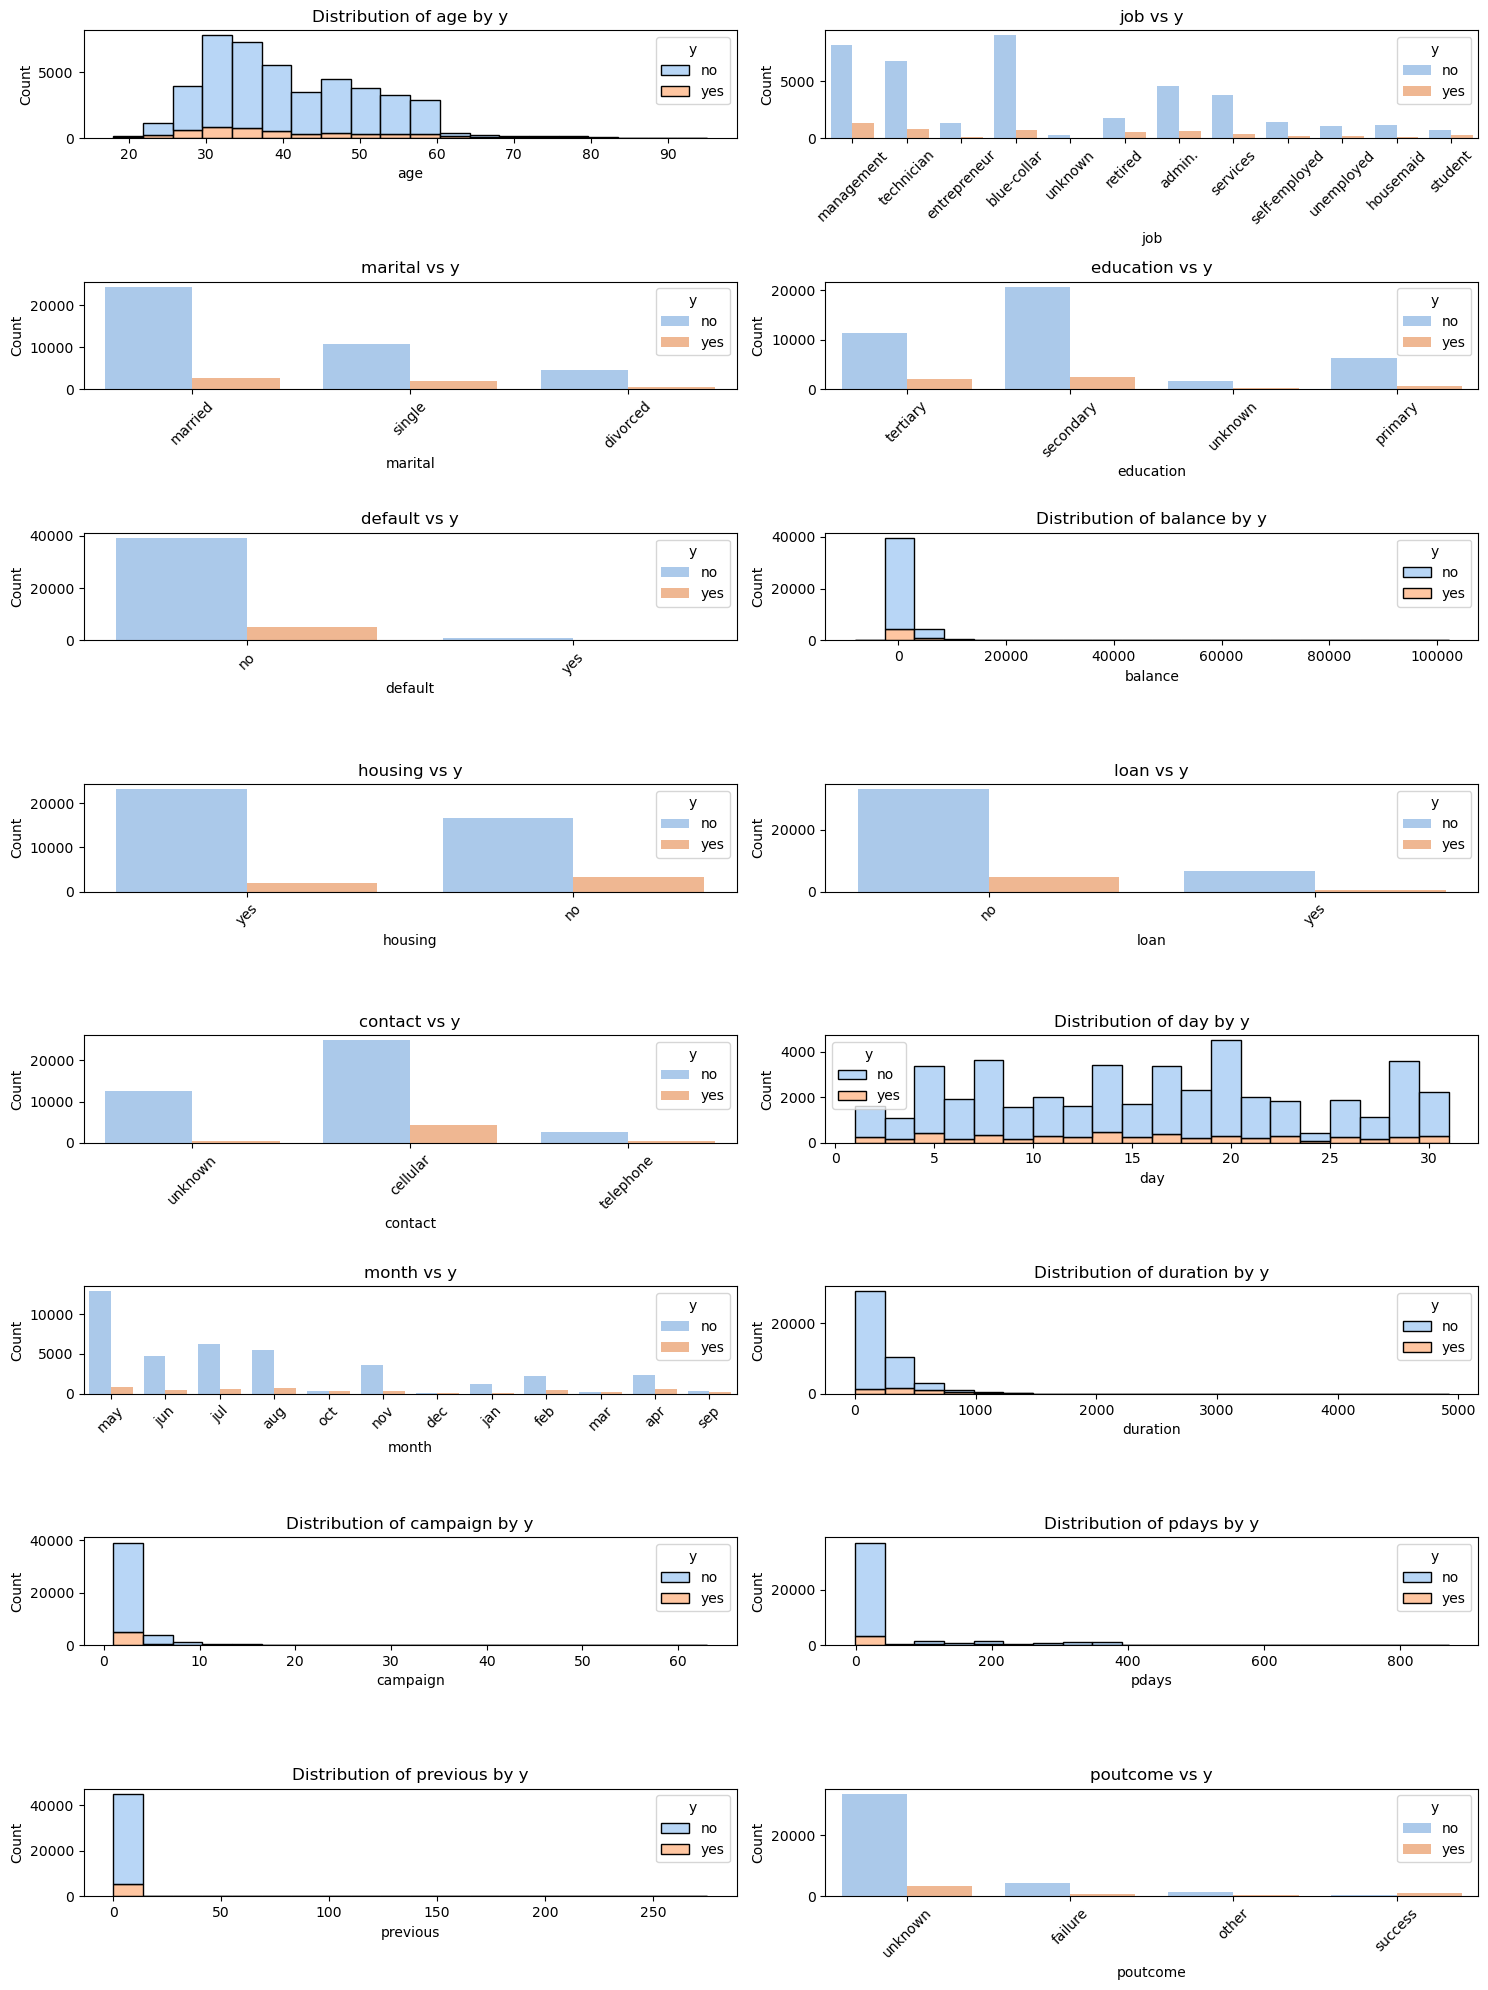

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_features_vs_target(dataset, target_column='y'):
    # Exclude the target column from the list of features
    features = dataset.columns.tolist()
    features.remove(target_column)

    # Determine the number of rows and columns for subplots
    num_rows = (len(features) + 1) // 2
    num_cols = 2

    # Create subplots for each feature
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
    fig.subplots_adjust(hspace=0.5)

    # Iterate through features and create subplots
    for i, feature in enumerate(features):
        row = i // num_cols
        col = i % num_cols

        if dataset[feature].dtype == 'object':
            sns.countplot(data=dataset, x=feature, hue=target_column, ax=axes[row, col])
            axes[row, col].set_title(f'{feature} vs {target_column}')
            axes[row, col].set_ylabel('Count')
            axes[row, col].set_xlabel(feature)
            axes[row, col].tick_params(axis='x', rotation=45)
        else:
            sns.histplot(data=dataset, x=feature, hue=target_column, multiple='stack', ax=axes[row, col], bins=20)
            axes[row, col].set_title(f'Distribution of {feature} by {target_column}')
            axes[row, col].set_ylabel('Count')
            axes[row, col].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

# Call the function to plot features versus the target variable
plot_features_vs_target(analyzer.dataset)


# MULTIVARIATE ANALYSIS

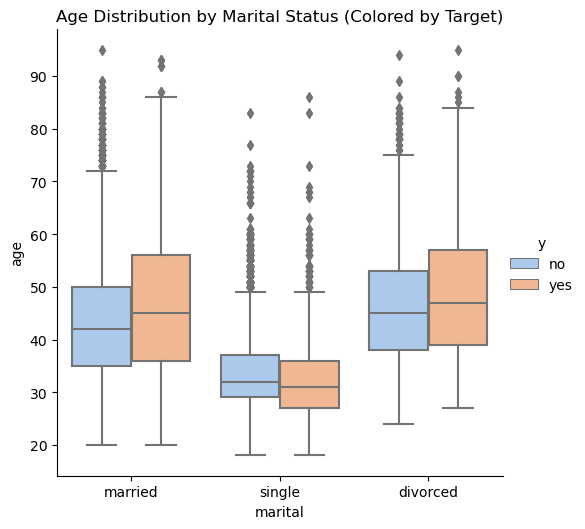

In [14]:
sns.catplot(data=analyzer.dataset, x='marital', y='age', hue='y', kind='box')
plt.title("Age Distribution by Marital Status (Colored by Target)")
plt.show()


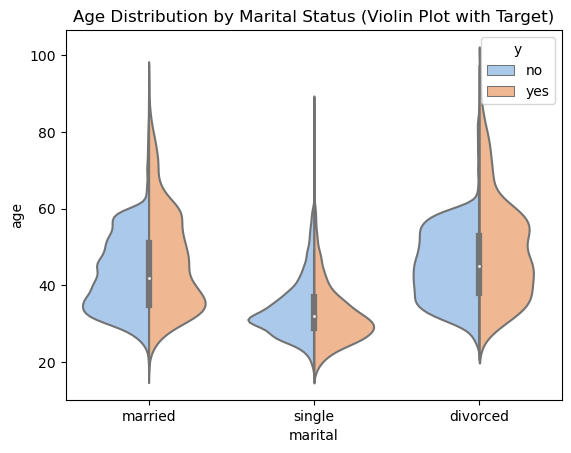

In [15]:
sns.violinplot(data=analyzer.dataset, x='marital', y='age', hue='y', split=True)
plt.title("Age Distribution by Marital Status (Violin Plot with Target)")
plt.show()


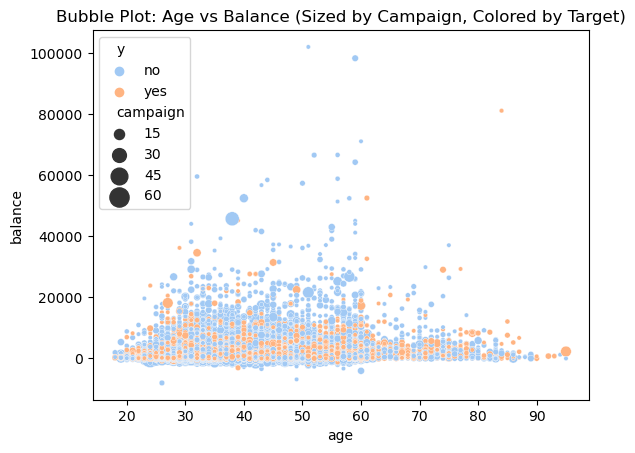

In [16]:
sns.scatterplot(data=analyzer.dataset, x='age', y='balance', size='campaign', sizes=(10, 200), hue='y')
plt.title("Bubble Plot: Age vs Balance (Sized by Campaign, Colored by Target)")
plt.show()


![thanks](images/thankyouimage.png)